In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Loading datasets
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


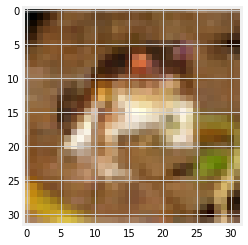

In [ ]:
plt.imshow(x_train[0])

In [ ]:
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog','frog', 'horse', 'ship', 'truck']
entry = {}
for i in range(y_test.size):
  index = y_test[i][0]
  entry[i] = classification[index]
entry

{0: 'cat',
 1: 'ship',
 2: 'ship',
 3: 'airplane',
 4: 'frog',
 5: 'frog',
 6: 'automobile',
 7: 'frog',
 8: 'cat',
 9: 'automobile',
 10: 'airplane',
 11: 'truck',
 12: 'dog',
 13: 'horse',
 14: 'truck',
 15: 'ship',
 16: 'dog',
 17: 'horse',
 18: 'ship',
 19: 'frog',
 20: 'horse',
 21: 'airplane',
 22: 'deer',
 23: 'truck',
 24: 'dog',
 25: 'bird',
 26: 'deer',
 27: 'airplane',
 28: 'truck',
 29: 'frog',
 30: 'frog',
 31: 'dog',
 32: 'deer',
 33: 'dog',
 34: 'truck',
 35: 'bird',
 36: 'deer',
 37: 'automobile',
 38: 'truck',
 39: 'dog',
 40: 'deer',
 41: 'frog',
 42: 'dog',
 43: 'frog',
 44: 'airplane',
 45: 'truck',
 46: 'cat',
 47: 'truck',
 48: 'horse',
 49: 'frog',
 50: 'truck',
 51: 'ship',
 52: 'airplane',
 53: 'cat',
 54: 'ship',
 55: 'ship',
 56: 'horse',
 57: 'horse',
 58: 'deer',
 59: 'frog',
 60: 'horse',
 61: 'cat',
 62: 'frog',
 63: 'cat',
 64: 'frog',
 65: 'bird',
 66: 'automobile',
 67: 'bird',
 68: 'cat',
 69: 'horse',
 70: 'bird',
 71: 'frog',
 72: 'ship',
 73: 'ship

In [ ]:
#preparing data for neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#Normalization
x_train = x_train/255
y_train = y_train/255

In [ ]:
#Create model architecture 
model = Sequential()

#Add the first layer
model.add(Conv2D(32, (5,5), input_shape = (32,32,3), activation = 'relu'))
#Downsamples/Downplay the value of the parameters
model.add(MaxPooling2D(pool_size=(2,2))) #Converting it into black and white

model.add(Conv2D(32, (5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) #Reduced dimensionality to a single dimension array
model.add(Dense(1000, activation = 'relu')) #adding a layer of 1000 neurons 
model.add(Dropout(0.5))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
#model.add(Dense(1000, activation = 'softmax'))
model.add(Dense(10, activation = 'softmax'))

# dropout_rate = 0.25 
# number_of_nodes = 200 
# for i in range(11):
#   model.add(Dense(200, activation = 'relu'))
#   model.add(Dropout(dropout_rate))





In [ ]:
 #compile the model 
 model.compile(loss = 'categorical_crossentropy', 
               optimizer = 'adam', 
               metrics = ['accuracy']
               )

In [ ]:
hist = model.fit(x_train,
                 y_train_one_hot,  
                 epochs = 15,
                 validation_split = 0.2)


Epoch 1/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5086 - accuracy: 0.8238 - val_loss: 0.9470 - val_accuracy: 0.7049
Epoch 2/15
1250/1250 [==============================] - 6s 4ms/step - loss: 0.4644 - accuracy: 0.8379 - val_loss: 0.9915 - val_accuracy: 0.7013
Epoch 3/15
1250/1250 [==============================] - 6s 4ms/step - loss: 0.4375 - accuracy: 0.8487 - val_loss: 0.9872 - val_accuracy: 0.7040
Epoch 4/15
1250/1250 [==============================] - 6s 4ms/step - loss: 0.4189 - accuracy: 0.8557 - val_loss: 0.9879 - val_accuracy: 0.7110
Epoch 5/15
1250/1250 [==============================] - 6s 4ms/step - loss: 0.3962 - accuracy: 0.8649 - val_loss: 0.9799 - val_accuracy: 0.7076
Epoch 6/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3842 - accuracy: 0.8657 - val_loss: 0.9900 - val_accuracy: 0.7008
Epoch 7/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3640 - accuracy: 0.8740 - val_loss: 1.0266 - val_accuracy:

In [ ]:
   #Evaluate the model
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 3ms/step - loss: 319.8469 - accuracy: 0.5675


0.5674999952316284

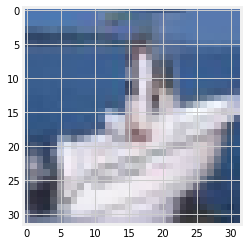

In [ ]:
image = x_test[9000]
plt.imshow(image)

In [ ]:

p = model.predict(np.array([image]))
percentages = {} 
for i in  range(len(p[0])):
  percentages[classification[i]] = p[0][i] * 100

percentages



{'airplane': 0.0,
 'automobile': 0.0,
 'bird': 0.0,
 'cat': 0.0,
 'deer': 0.0,
 'dog': 0.0,
 'frog': 0.0,
 'horse': 0.0,
 'ship': 100.0,
 'truck': 0.0}

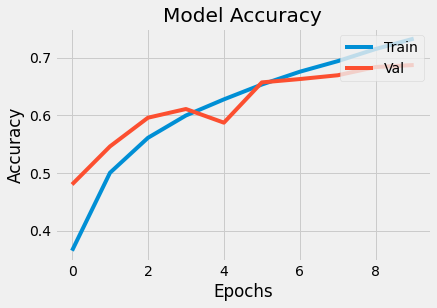

In [ ]:
#Visulaize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

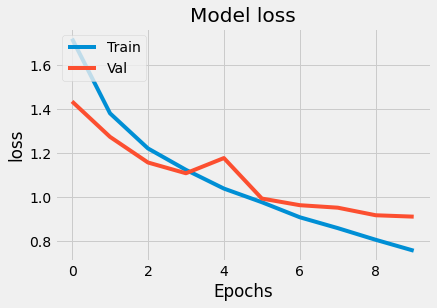

In [ ]:
#Visualize model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show()

In [ ]:
#Test the model with an example 
from google.colab import files 
uploaded = files.upload()

Saving airplane.jpg to airplane.jpg


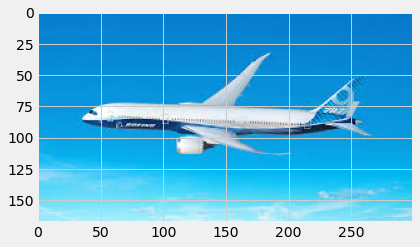

In [ ]:
#show the image
new_image = plt.imread('airplane.jpg')
imp = plt.imshow(new_image)

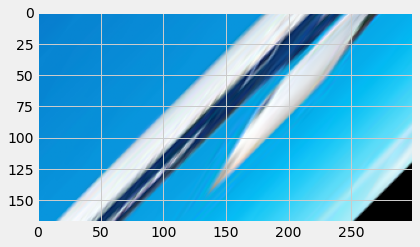

In [ ]:
from skimage.transform import resize, AffineTransform, warp
resized_image = resize(new_image, (32,32,3))

tform = AffineTransform(np.array([[0.5,0.3,0],[0.4,0.4,0],[0,0,1]]))
transformed = warp(new_image, tform)
img = plt.imshow(transformed)

In [ ]:
#Get the models preidictions 
predictions = model.predict(np.array([resized_image]))
predictions

array([[7.3363876e-01, 1.4758016e-03, 2.0348199e-03, 5.5833824e-04,
        1.4966507e-03, 2.7708049e-04, 2.0644278e-04, 1.8216218e-04,
        2.5693464e-01, 3.1953249e-03]], dtype=float32)

In [ ]:
smaller = predictions[0]
max = 0 
index = 0
for prob in range(smaller.size):
  if smaller[prob] > max: 
    max = smaller[prob]
    index = prob

print(classification[index])


airplane
